# Tutorial 0d: An introduction to Julia syntax and plotting

© 2021 Tom Röschinger. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT)  

--- 

In this tutorial, we will learn some of the basics of programming in Python. While this will all become muscle memory, it's useful to keep this as a reference. To follow along with this tutorial, launch a Jupyter notebook [as described in tutorial 0b](t0b_jupyter_notebooks.html) and type along as we go into the code cells. 

## Basic shell commands

In [tutorial 0b](t0b_jupyter_notebooks.html), you learned how to launch a Jupyter notebook from a terminal. Having knowledge of some basic UNIX command line skills, such as moving between directories, listing files in a given directory, and making new directories, is imperative to becoming a computational scientist. Please see [this wonderful tutorial by Justin Bois](http://justinbois.github.io/bootcamp/2016/lessons/l02_basic_command_line_skills.html) for a primer on using the command line. Briefly, you will only need to know three commands.


1. `cd` - "Change directories". By typing this command, you will be able to move from where you currently are to another folder. You can do this by specifically typing a path, such as `cd /Users/sbeeler/bootcamp`. You can also move *relative* to where you currently are by using some shorthand notation. Typing `cd ..` will move you **up** one directory, `cd ../..` will move you up two directories, and `cd ~/` will move you to your home directory. 

2. `ls` - "List files and directories". Typing this command in your terminal will list all files and directories in your current working directory.

3. `mkdir` - "Make directory". This is useful for making new directories on your computer without having to open Finder or Windows Explorer. For example, I can make a `data` folder in my `bootcamp` root directory by typing `mkdir data`. I could make another folder called `good_data` two directories up from my current folder by typing `mkdir ../../good_data`. 

With these three commands memorized, you should be able to navigate around your computer without leaving the terminal. 

## `Hello, world` 

As is typical when learning any programming language, we'll start by making our computer speak to us.

In [1]:
print("Hello, world")

Hello, world

In the above code, we called the `print` function and passed the text `Hello, world.` surrounded by single quotation marks `""`. An important difference to Python is that `''` cannot be used for strings, but only for single characters.

In [4]:
'a'

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

In the `print` function, the text was passed as an **argument** by placing it in the parentheses. The quotation marks determined the **type** of the argument to be text, known as a **string**.

While our `"Hello, world."` is a string, this function can also be used to print other types such as integers (**`int`**), decimals (**`float`**), and `true/false` (**`bool`**) by passing them as arguments to the `print` function. 

In [6]:
print(10)
print(3.14159)
print(true)

103.14159true

Oh here we see difference in the `print` function. In Julia, the `print` function does not end the line automatically. If this behavior is wanted, the function `println` has to be used instead.

In [7]:
println(10)
println(3.14159)
println(true)

10
3.14159
true


This looks better. While the code we have written above is understandable the way it is, it is good practice to add **comments** to code. Code can become quite complex and hard to understand quite quickly. Comments are lines of code that are not executed and can therefore be used to describe what the lines of actual codes are doing. In Julia (just as in Python), comments are written by adding a pound symbol (`#`) before a line of code.

In [8]:
# Print an integer
println(10)

# Print a float
println(3.14159)

# Print a bool
print(true)

10
3.14159
true

## Basic math 

###  Arithmetic

The crux of scientific programming is the ability to perform mathematical operations. Python can do a variety of simple mathematical functions by default.  

In [9]:
println(1 + 1) # this should be 2
println(4 / 2) # this should be 2.0
println(40 - 38) # this should be 2
print(2^4) # this should be 16

2
2.0
2
16

In Julia, we can use the `^` operator to exponentiate.

The operator `*` operator can also be used on strings.

In [11]:
print("AATAGGCGATAG" * "tttgaggcgggggc")

AATAGGCGATAGtttgaggcgggggc

While all of these operations are simple, we would like some way in which can store a number for further use. We can do this by assigning the output of an operation to a **variable**.

In [12]:
# Assign our sequences to variables.
seq_1 = "AATAGGCGATAG"
seq_2 = "tttgaggcgggggc"
stitched_seq = seq_1 * seq_2
print(stitched_seq)

AATAGGCGATAGtttgaggcgggggc

We can call **methods** on some data types in Python. For example, we can convert our stitched string into all upper or lower case using the `uppercase()` or `lowercase()` function. 

In [16]:
# Convert the stitched sequences to all upper and all lower case.
upper_seq = uppercase(stitched_seq)
lower_seq = lowercase(stitched_seq)
println(upper_seq)
println(lower_seq)

AATAGGCGATAGTTTGAGGCGGGGGC
aataggcgatagtttgaggcgggggc


We can also count the occurrences of a given character in a string by using the `count()` method. To use it for counting characters in strings, we have to write a anonymous function, `x->(x=="A")`.

In [23]:
count(x->(x=='A'), upper_seq)

6

In [28]:
# Count the number of the different bases in the stitched DNA sequence.
num_A = count(x->(x=='A'), upper_seq)
num_T = count(x->(x=='T'), upper_seq)
num_C = count(x->(x=='C'), upper_seq)
num_G = count(x->(x=='G'), upper_seq)

# Print them to the screen for good measure.
println(num_A)
println(num_T)
println(num_C)
println(num_G)

6
5
3
12


### Lists and tuples

So far, we've learned about floats, ints, bools, and strings as well as how to assign them to variables. But what about when we want to work with a series of these kinds of values? There are a few ways in which we can do this $-$ **arrays** and **tuples**.

In Julia, there is no difference between lists and arrays. Arrays can be created in multiple different ways. The most straight forward way is to simply use brackets `[]`.

In [36]:
# Create and empty array
empty_1d = []
println(empty_1d)

# Create array with mixed entries
mixed_1d = [1, 2, "3"]
println(mixed_1d)

# Create array with only integers entries
int_1d = [1, 2, 3]
println(int_1d)

Any[]
Any[1, 2, "3"]
[1, 2, 3]


Here we can see something interesting. Julia infers the type of an array by checking the type of its elements. If it cannot find a unique type (or a joint supertype, but don't worry about this detail), it gives the Array the type `Any`. Let's see what the type of the array is that only has integer entries.

In [38]:
typeof(int_1d)

Vector{Int64} (alias for Array{Int64, 1})

Here Julia could find a unique type. Also, one dimensional arrays are automatically as vectors.

Arrays can also be created by using an explicit contructor.

We can extract a single value or a range of values by **indexing**. 

In [43]:
# Index some values.
println(mixed_1d[1])  # should be 1
println(mixed_1d[2:3])  # should be "[2, "3"]"
println(mixed_1d[end])  # This will give the last entry of the list 

1
Any[2, "3"]
3


To get the first value of the list, we started with one. **In Julia, indexing begins at `1`.**

So what exactly is the difference between tuples and lists? **Lists are mutable. Tuples are not**. This means once a value in a tuple is set in place, it can't be changed without redefining the tuple. Let's demonstrate this by trying to change the first value of our `example_list` and `example_tuple`.

In [9]:
# Change the first entry to 1000 
example_list[0] = 1000
print(example_list)
example_tuple[0] = 1000
print(example_tuple)

[1000, 2, 3]


TypeError: 'tuple' object does not support item assignment

Python yelled at us and told is that we cannot reassign a current value in a tuple. This is a very important point. For example, if you want to have some process output a series of values you don't want to be changed, put them in a tuple. Otherwise, put them in a list or an array. 

Lists **are** mutable, but we have to be careful with performing arithmetic operations on them. For example, the operators `+`,`-`, `**`, and `/` will give you errors. However, the `*` operator will concatenate a list with itself.

In [13]:
# Do list arithmetic.
next_list = [2, 4, 6]
print(next_list * 2)  # Should be [2, 4, 6, 2, 4, 6]
print(next_list * 5)  # Should be the same list repeated five times.

[2, 4, 6, 2, 4, 6]
[2, 4, 6, 2, 4, 6, 2, 4, 6, 2, 4, 6, 2, 4, 6]


So how do we do more complicated mathematical operations on a series of numbers? How can I multiply each element of an array by five? How do I take the exponential of each element? How do I perform a dot product between two series? To perform such tasks, we will have to import another Python module, [NumPy](http://www.numpy.org). 

## Importing modules and working with NumPy

When you open a Python interpreter or run a script, you are only loading the 'standard' Python packages. This means that you are not loading everything you could possibly want, but only the packages you need to perform the task. To perform more elaborate computation in Python, we will need to import an external **module** called NumPy. 

In [14]:
# Import the NumPy module and give it an alias
import numpy as np

Whenever you write a Python script, you should always import the modules you will need at the very beginning. That way, all of the required packages will be loaded and ready to go when you start loading them. 

Let's talk about the syntax of the above line. I told the Python interpreter that it should **import** the module called `numpy` and give it the **alias** of `np`. This means whenever I have to call a  Numpy associated function, I can do so by typing `np.function_name` instead of `numpy.function_name`. The alias can be whatever you would like it to be, but you should stick by the community standards so your code is clear to everyone who is trying to figure out what you are doing. 

Numpy is the premier numerical computing module for Python. With it, we have myriad functions for peforming numerical operations.

In [15]:
# Demonstrate the power of numpy.
print(np.exp(-1))
print(np.sin(1))
print(np.cos(2 * np.sin(5)))
print(np.sin(2 * np.pi))

0.36787944117144233
0.8414709848078965
-0.3401272599624713
-2.4492935982947064e-16


With numpy comes a new data type called **numpy arrays**. These are series of values which are mutable (just like lists) which cannot have a mixed data type (unlike lists and tuples).  We can also perform mathematical operations on arrays.

In [16]:
# Demonstrate the magic of numpy arrays
my_array = np.array([1, 2, 3])

#Basic arithmetic
print(my_array * 2)  # Element-wise multiplication
print(my_array / 3)  # Element-wise division
print(my_array * my_array)  # Element-wise multiplication
print(np.dot(my_array, my_array)) # Dot product of two arrays

[2 4 6]
[0.33333333 0.66666667 1.        ]
[1 4 9]
14


Numpy arrays are not limited to being one-dimensional. We can create n-dimensional numpy arrays with ease.

In [17]:
# Create multi-dimensional arrays
one_dimensional_array = np.array([1, 2, 3, 4])
two_dimensional_array = np.array([[1, 2, 3, 4],
                                  [5, 6, 7, 8]])  

print(one_dimensional_array)
print(two_dimensional_array)

[1 2 3 4]
[[1 2 3 4]
 [5 6 7 8]]


We can even make numpy make series of values for us! This will be very useful once we start manipulating images and making plots. 

In [18]:
# Automatically generate series of values.
linear_spaced = np.linspace(0, 10, 1000)  # Generates 1000 points between 0 and 10 
log_spaced = np.logspace(-1, 1, 200) # Generates 200 points logarithmically spaced 
                                     # between .1 and 10
aranged = np.arange(0, 50, 2)  # Generates values between 0 and 50 taking steps of 
                               # two.

It is impossible to perform scientific computing in Python without using numpy.

##  Checking type, length, and shape

It's useful to be able to see some properties of variables we assign. Let's look back at the sequence strings we made earlier and extract some of their properties. 

In [19]:
# Generate some variable with different types.
string_type = 'AATGATTCG'
float_type = 3.14159
bool_type = True
int_type = 3
list_type = ['Escherichia coli', 'Salmonella enterica', 10]
tuple_type = ('Geospiza fortis', 3)
nparray_type = np.ones_like(tuple_type)

# Print their types
print(type(string_type))
print(type(float_type))
print(type(bool_type))
print(type(int_type))
print(type(list_type))
print(type(tuple_type))
print(type(nparray_type))

<class 'str'>
<class 'float'>
<class 'bool'>
<class 'int'>
<class 'list'>
<class 'tuple'>
<class 'numpy.ndarray'>


Note that even though the elements of our `list_type` and `tuple_type` have mixed types, this command tells us what the type of the *object* is (i.e. `list` and `tuple`). We can force changes in the type of a variable with ease. To demonstrate, let's break up our stitched sequence into the individual basepairs. 

In [20]:
# Change the type of a varible
basepairs = list(stitched_seq)
print(basepairs)

['A', 'A', 'T', 'A', 'G', 'G', 'C', 'G', 'A', 'T', 'A', 'G', 't', 't', 't', 'g', 'a', 'g', 'g', 'c', 'g', 'g', 'g', 'g', 'g', 'c']


We can  also convert numbers to strings. This is useful if we want to print a sentence including the output from some other operation. Let's check the length of our two DNA sequences and print it in a sentence.

In [21]:
# Determine the lengths of the two sequences.
seq_1_len = len(seq_1) 
seq_2_len = len(seq_2)
print("The length of our sequence is " + str(seq_1_len + seq_2_len) + ' bases')

The length of our sequence is 26 bases


We've created *a lot* of variable so far in this tutorial. It's nice to be able to look at what variables exist in our environment as well as get some information. Let's take a look at everything we've made so far. 

In [22]:
whos

Variable                Type       Data/Info
--------------------------------------------
aranged                 ndarray    25: 25 elems, type `int64`, 200 bytes
basepairs               list       n=26
bool_type               bool       True
example_list            list       n=3
example_tuple           tuple      n=3
float_type              float      3.14159
int_type                int        3
linear_spaced           ndarray    1000: 1000 elems, type `float64`, 8000 bytes
list_of_lists           list       n=1
list_type               list       n=3
log_spaced              ndarray    200: 200 elems, type `float64`, 1600 bytes
lower_seq               str        aataggcgatagtttgaggcgggggc
mixed_type_list         list       n=5
my_array                ndarray    3: 3 elems, type `int64`, 24 bytes
next_list               list       n=3
np                      module     <module 'numpy' from '/an<...>kages/numpy/__init__.py'>
nparray_type            ndarray    2: 2 elems, type `<U15`, 12

We see that we get a relatively nicely ordered list of all of our variables, the type of the variable, and then information about their contents. We can see for our lists and arrays it tells us the number of rows and columns, how many elements there are, what the type of those elements are and so forth. 

##  Functions

Functions are arguably the most important components of efficient and effective programming. Functions are sections of code that are written to take an argument, perform some manipulation, and return the manipulated argument. In Python, these functions can be written in the same script where you want to use them.

In Python, spacing and indentation matters. When we define a function and perform looping, we have to be very aware of where our code exists in the script. Once you define a function, all operations that are to take place in that function should be indented from the rest of the code.  

The best way to learn is by doing. Let's write a function to add two DNA sequences together and determine its [GC content](https://en.wikipedia.org/wiki/GC-content), the percentage of the DNA that is either guanine or cytosine.

In [23]:
def compute_gc(seq_a, seq_b, print_seq=True):
    """
    Stitches together two DNA sequences (seq_a and seq_b) into a single sequence
    then computes the GC content. This is defined as the number of G's and C's in
    the sequence divided by the total sequence length.
    """
    
    # Merge the sequences together.
    merged_sequence = seq_a + seq_b
    
    # Determine if the new string should be printed. 
    if print_seq == True:
        print(merged_sequence)
        
    # Make the merged string all upper-case.
    merged_upper = merged_sequence.upper()
    
    # Count the number of G's and C's.
    num_G = merged_upper.count('G')
    num_C = merged_upper.count('C')
    
    # Compute the length of the sequence and the GC content.
    seq_len = len(merged_upper)
    gc_content = (num_G + num_C) / seq_len
    
    # Return the gc_content
    return gc_content

We did a lot of complicated procedures in this code, so let's go through it piece by piece.

1. We **def**ined the function as `compute_gc` which takes the arguments `seq_a` and `seq_b` as well as a keyword argument `print_sequence` which has a default value of `True`.
2. We wrote some information about the what the function does and what arguments it takes. The tripple quoation marks (`"""`) allows us to write strings that go over multiple lines in the code cell.
3. We then performed the operation by adding together `seq_a` and `seq_b` and assigning it to a new variable called `merged_sequence`.
4. We tested if the function should print the resut to the screen. We did this by using an `if` statement. This tested **`if`** `print_seq` was equal to `True`. If it that was the case, the `print` function was called and printed the value of `merged_sequence`.
5. The GC content is computed and the function is told to **`return`** the value.

Each line in this function was one-tab away from the definition statement of the function. Note that we were never specific about *what* the value of `seq_a` and what `seq_b` are. 

In [24]:
# Add some various values together.
all_A = 'aaaa'
all_T = 'Tttt'
all_C = 'CcCC'
all_G = 'GgGg'
AT_only = compute_gc(all_A, all_T) 
GC_only = compute_gc(all_G, all_C)
AC_only = compute_gc(all_A, all_C)  
# Print the variables we assigned them to.
print(AT_only, GC_only, AC_only)

aaaaTttt
GgGgCcCC
aaaaCcCC
0.0 1.0 0.5


We should be pleased to see that `AT_only` has a GC content of 0, `GC_only` has a GC content of 1.0, and `AC_only` has a value of 0.5, as we predicted.
Since we added the automatic printing of values as a **keyword argument**, we can easily tell our function to stop printing things.  

In [25]:
AT_only = compute_gc(all_A, all_T, print_seq=False) 
GC_only = compute_gc(all_G, all_C, print_seq=False)
AC_only = compute_gc(all_A, all_C, print_seq=False)  
# Print the variables we assigned them to.
print(AT_only, GC_only, AC_only)

0.0 1.0 0.5


Being able to write functions to automate tasks will be very valuable in the future $-$ especially when we start working with images. 

##  Our first `for` loop

Rather than using "boring" simple operations to learn some syntax, let's learn about the `for` loop by using a biological example. 

Let's say that we have a cell sitting in a tube of growth medium. If we place this tube at the right temperature, the cells will grow exponentially. We can write down a very simple model that as long as the cells are well below the carrying capacity of their environment, they will grow as 
$$
N(d) = 2^{d},
$$

where $N(d)$ is the number of cells at division $d$. To test this model, we'll write a very short simulation to test that the a cell would grow exponentially. 

Before we think of how the specific code should be written, let's write out what our thought process should be. 

1. We should first define the initial number of cells as well as the number of divisions to simulate.
2. For each cell division, we should multiply the number of cells that we had in the last division event. 
3. After each division, we should keep track of how many cells there are.

With this idea in place, let's go through the code.

In [26]:
# Set the initial number of cells in the experiment.
number_of_cells = 1

# Set the number of division cycles for the experiment.
number_of_divisions = 10

# Set a list of number of cells at division d and start with 1 cell
N_d = [number_of_cells]

# Loop through each division event
for i in range(number_of_divisions):
    # Make the cells duplicate
    number_of_cells = number_of_cells * 2 
   
    # Add the new number of cells to our storage list.
    N_d.append(number_of_cells)


We covered a lot of syntax in that cell, so let's take a look at it piece by piece.  

* `number_of_cells = 1`: We assigned our starting number of cells to a variable.
* `number_of_divisions = 10`: We assigned a value for the total number of divisions to a variable.
* `N_d = [number_of_cells]`: We made a list where the first entry (our starting point) only has one cell.

Now we enter the for loop, which exectues our simulation.

* `for i in range(number_of_divisions)`: This starts the for loop. We are using the variable `i` as an iterator (basically a counter). Each time we go through the loop, `i` will take on the next value of the `range` function. The `range` function generates a list of integers starting from `0` to `number_of_divisions` which we set as 10.
* `number_of_cells = number_of_cells * 2`: This performed the cell division, doubling the number of cells. We also reassigned the value of this variable. Through the next iteration of the loop, the number will double again.
* `N_d.append(number_of_cells)`: This is using the `append` method of the `N_d` list to **add** the number of cells at each division to our list before we go on to the next round of the loop. 

Also notice that, just like in functions, the code is indented. Everything that is indented to the same level will execute within the loop. 


Let's take a look at our `N_d` list and see how the number of cells changed over time. 

In [27]:
# Print the result of our simulation.
print(N_d)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]


It looks like our function worked! But can we tell this is exponential growth? Because this is a simple case, we can see that the number of cells are doubling at each division. However, It would be very useful to plot these results. 

## Plotting using `matplotlib`

There are many plotting utilities available for Python. Some notable examples include [Bokeh](http://bokeh.pydata.org/en/latest) for interactive plotting, [Seaborn](http://seaborn.pydata.org) and [Altair](https://altair-viz.github.io) for statistical visualization, and a Python port of the popular R programming language plotting utility [ggplot](https://github.com/yhat/ggplot). While interactive plotting is likely the visualization tool of the future, the most common (and full featured) plotting utility for Python as of this writing is [matplotlib](http://matplotlib.org). It was designed with the plotting syntax and style of MATLAB in mind and many of the commands are similiar. As is the case with numpy, matplotlib is not within the standard libray of Python and must be imported.

In [28]:
# Load the plotting utility matplotlib with an alias plt.
import matplotlib.pyplot as plt

# The following line allows for plots to be rendered in this notebook. 
%matplotlib inline

We would like to see if our simulated cells appear to grow exponentially with time. To do so, we would like to plot the number of cells we have at division number $d$ as a function of $d$. Before we do any plotting, let's generate a vector of division times that matches the size of our `N_d` vector. We can do this using some of the arrangement methods that we used earlier with numpy. Since we had a measure at $d=0$, our new division vector must have a length of `number_of_divisions` + 1. 

In [29]:
# Establish a vector of the division cycles
division_vector = np.arange(0, number_of_divisions + 1, 1)

Now all that is left is to plot it! We can use the `plot` function of matplotlib to generate our scatterplot. We'll choose small circles as our markers and provide the approriate $x$ and $y$ labels as we always should. We'll also add a legend to our plot to show that these data poitns are from a simulation. 

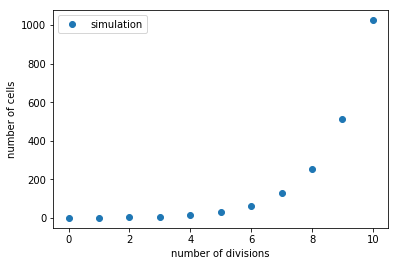

In [30]:
# Generate the plot.
plt.plot(division_vector, N_d, 'o', label='simulation')

# Set the axis labels.
plt.xlabel('number of divisions')
plt.ylabel('number of cells')

# Add a legend
plt.legend()

In calling the `plt.plot()` function, we first passed it the $x$ and $y$ data, told it to plot the points as circles (through the `'o'` argument), and finally gave it a label. 

To me, this plot is pretty ugly. Every aspect of this plot can be stylized to your liking, althought it will take a little bit of work. However, we can import the `seaborn` plotting utility which will stylize all of our plots and make them much clearer to interpret.

In [31]:
import seaborn as sns
sns.set()

 With this imported, let's go ahead and remake the plot from above. We'll also save it using the `plt.savefig` function.

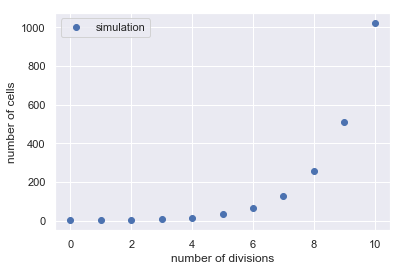

In [32]:
# Generate the plot.
plt.plot(division_vector, N_d, 'o', label='simulation')

# Set the axis labels.
plt.xlabel('number of divisions')
plt.ylabel('number of cells')

# Add a legend
plt.legend()
plt.savefig('growth_simulation.pdf')

That's much better! 

##  Asking for help

While we have covered a lot of Python syntax, I don't expect you will have all of it memorized! Every module (nearly) that you will use has a well constructed **documentation** that explains how functions should be used. Some great examples of this are the documentation pages for [NumPy and SciPy](https://docs.scipy.org/doc/numpy/), [seaborn](http://seaborn.pydata.org/), and [scikit-image](http://scikit-image.org/).


When you are typing away in the notebook or in an IPython terminal, you can pull up the documentation information for any function or attribute by typing the name followed by a question mark (`?`). For example (assuming you have `numpy` imported as `np`, you can get the documentation for the `np.random` module by typing the following.

In [33]:
np.random?

## In conclusion... 

In this tutorial, we worked through some of the basic syntax of the Python language, learned some crucial programming skills, and even generated a plot of cell growth over time. Through the rest of this course, you will build upon these skills and learn even more interesting and useful tidbits of programming. 